<a href="https://colab.research.google.com/github/manishmaltare/Manish-Maltare/blob/main/ASSIGNMENT_LogisticRegression_Deployment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # LOAD DATASET
import joblib
! pip install streamlit

In [2]:
features = pd.read_csv('/content/Titanic_train.csv')

In [3]:
target = pd.read_csv('/content/Titanic_test.csv')

In [4]:
# FEATURE EXTRACTION - i did perform it before EDA- 1 as the feature & target variable are given
# separately.

In [5]:
features.shape

(891, 12)

In [6]:
target.shape

(418, 11)

In [7]:
features.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# DATA PREPROCESSING : - "Imputation"
# Imputation i am using here to fill the blank rows, keeping rows empty can lead to
# model not run.
# I am using imputation here by filling the 'age' column with mean value of overall rows.

In [9]:
features['Age']=features['Age'].fillna(features['Age'].mean())

In [10]:
features.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# i am using imputation by applying most frequent rows into the blank ones in
# Embarked, as its having only 2-rows empty.

In [12]:
features['Embarked']=features['Embarked'].fillna(features['Embarked'].mode()[0])

In [13]:
features.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# i am using imputation here, by first separating first letter of Cabin,
# beacause, it is deck no. which i feel is the only useful for process.
# After that i did put a random string 'U' in the null rows.

In [15]:
features['Cabin']=features['Cabin'].str[0]

In [16]:
features['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
features['Cabin']=features['Cabin'].fillna('U')

In [18]:
features['Cabin']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [19]:
features.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
features.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin            9
Embarked         3
dtype: int64

In [22]:
# I drop the columns PassengerID & Name.
# Main reason : - having data value in all rows unique, Regression will not work.
# PassengerID is just serial no. as per the registration. and in +1 incerasing order.
# Name - i believe would not matter, as there are string data, which is not eay to convert
# into continuous no. or binary

In [23]:
features=features.drop(['PassengerId','Name'],axis=1)

In [24]:
features.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0     U        S  
1     C        C  
2     U        S  
3     C        S  
4     U        S

In [25]:
# DATA PREPROCESSING : - "Encode categorical data"

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
features['Sex']=le.fit_transform(features['Sex'])

In [29]:
features.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    1  22.0      1      0         A/5 21171   7.2500     U   
1         1       1    0  38.0      1      0          PC 17599  71.2833     C   
2         1       3    0  26.0      0      0  STON/O2. 3101282   7.9250     U   
3         1       1    0  35.0      1      0            113803  53.1000     C   
4         0       3    1  35.0      0      0            373450   8.0500     U   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [30]:
features['Embarked']=le.fit_transform(features['Embarked'])

In [31]:
features.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    1  22.0      1      0         A/5 21171   7.2500     U   
1         1       1    0  38.0      1      0          PC 17599  71.2833     C   
2         1       3    0  26.0      0      0  STON/O2. 3101282   7.9250     U   
3         1       1    0  35.0      1      0            113803  53.1000     C   
4         0       3    1  35.0      0      0            373450   8.0500     U   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

In [32]:
features.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin         9
Embarked      3
dtype: int64

In [33]:
# removing ticket as its having 76% on unique values as string & integers.
features=features.drop(['Ticket'],axis=1)

In [34]:
features['Cabin']=le.fit_transform(features['Cabin'])

In [35]:
features.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500      8         2
1         1       1    0  38.0      1      0  71.2833      2         0
2         1       3    0  26.0      0      0   7.9250      8         2
3         1       1    0  35.0      1      0  53.1000      2         2
4         0       3    1  35.0      0      0   8.0500      8         2

In [36]:
target.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [37]:
target.shape

(418, 11)

In [38]:
target.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [39]:
target.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
target=target.drop(['PassengerId','Name','Ticket'],axis=1)

In [41]:
target.head()

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S

In [42]:
target.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [43]:
# Repeating the same steps of Data preprocessing for 'target' varable to prepare the dataset for prediction.

In [44]:
target['Age']=target['Age'].fillna(target['Age'].mean())

In [45]:
target.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [46]:
target['Cabin']=target['Cabin'].str[0]

In [47]:
target.head()

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S

In [48]:
target['Cabin']=target['Cabin'].fillna('U')

In [49]:
target.head()

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292     U        Q
1       3  female  47.0      1      0   7.0000     U        S
2       2    male  62.0      0      0   9.6875     U        Q
3       3    male  27.0      0      0   8.6625     U        S
4       3  female  22.0      1      1  12.2875     U        S

In [50]:
# merging 'features' & 'target' variables to perform EDA.
# EDA-1

In [51]:
data_merged=pd.concat([features,target],ignore_index=True)
data_merged.head()

Survived  Pclass Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       0.0       3   1  22.0      1      0   7.2500     8        2
1       1.0       1   0  38.0      1      0  71.2833     2        0
2       1.0       3   0  26.0      0      0   7.9250     8        2
3       1.0       1   0  35.0      1      0  53.1000     2        2
4       0.0       3   1  35.0      0      0   8.0500     8        2

In [52]:
data_merged.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [53]:
data_merged.shape

(1309, 9)

In [54]:
data_merged.size

11781

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
z=data_merged.corr(numeric_only=True)

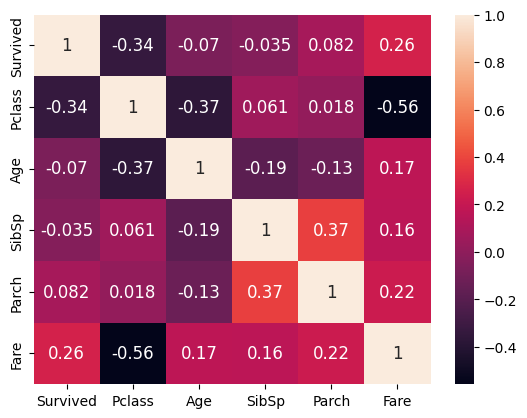

In [57]:
sns.heatmap(z,annot=True,annot_kws={'size': 12})
plt.show()
# Here the map shows that only Parch & Fare are positively coreleated, with Survived.
# which indicates that survival rate increases with no of parents & fare.
# Pclass is higly inversly corelated as comapre to Age & SibSp.
# which indicates that 1st class passenges have more chances of survival, as total count of 1st class is 216 & 3rd class is 1473.
# SibSp & Parch are mutully corelated variables.
# Fare & Survival comes in 2nd place.
# which indicates that with increase of fair , survival rate increases.

In [58]:
data_merged.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

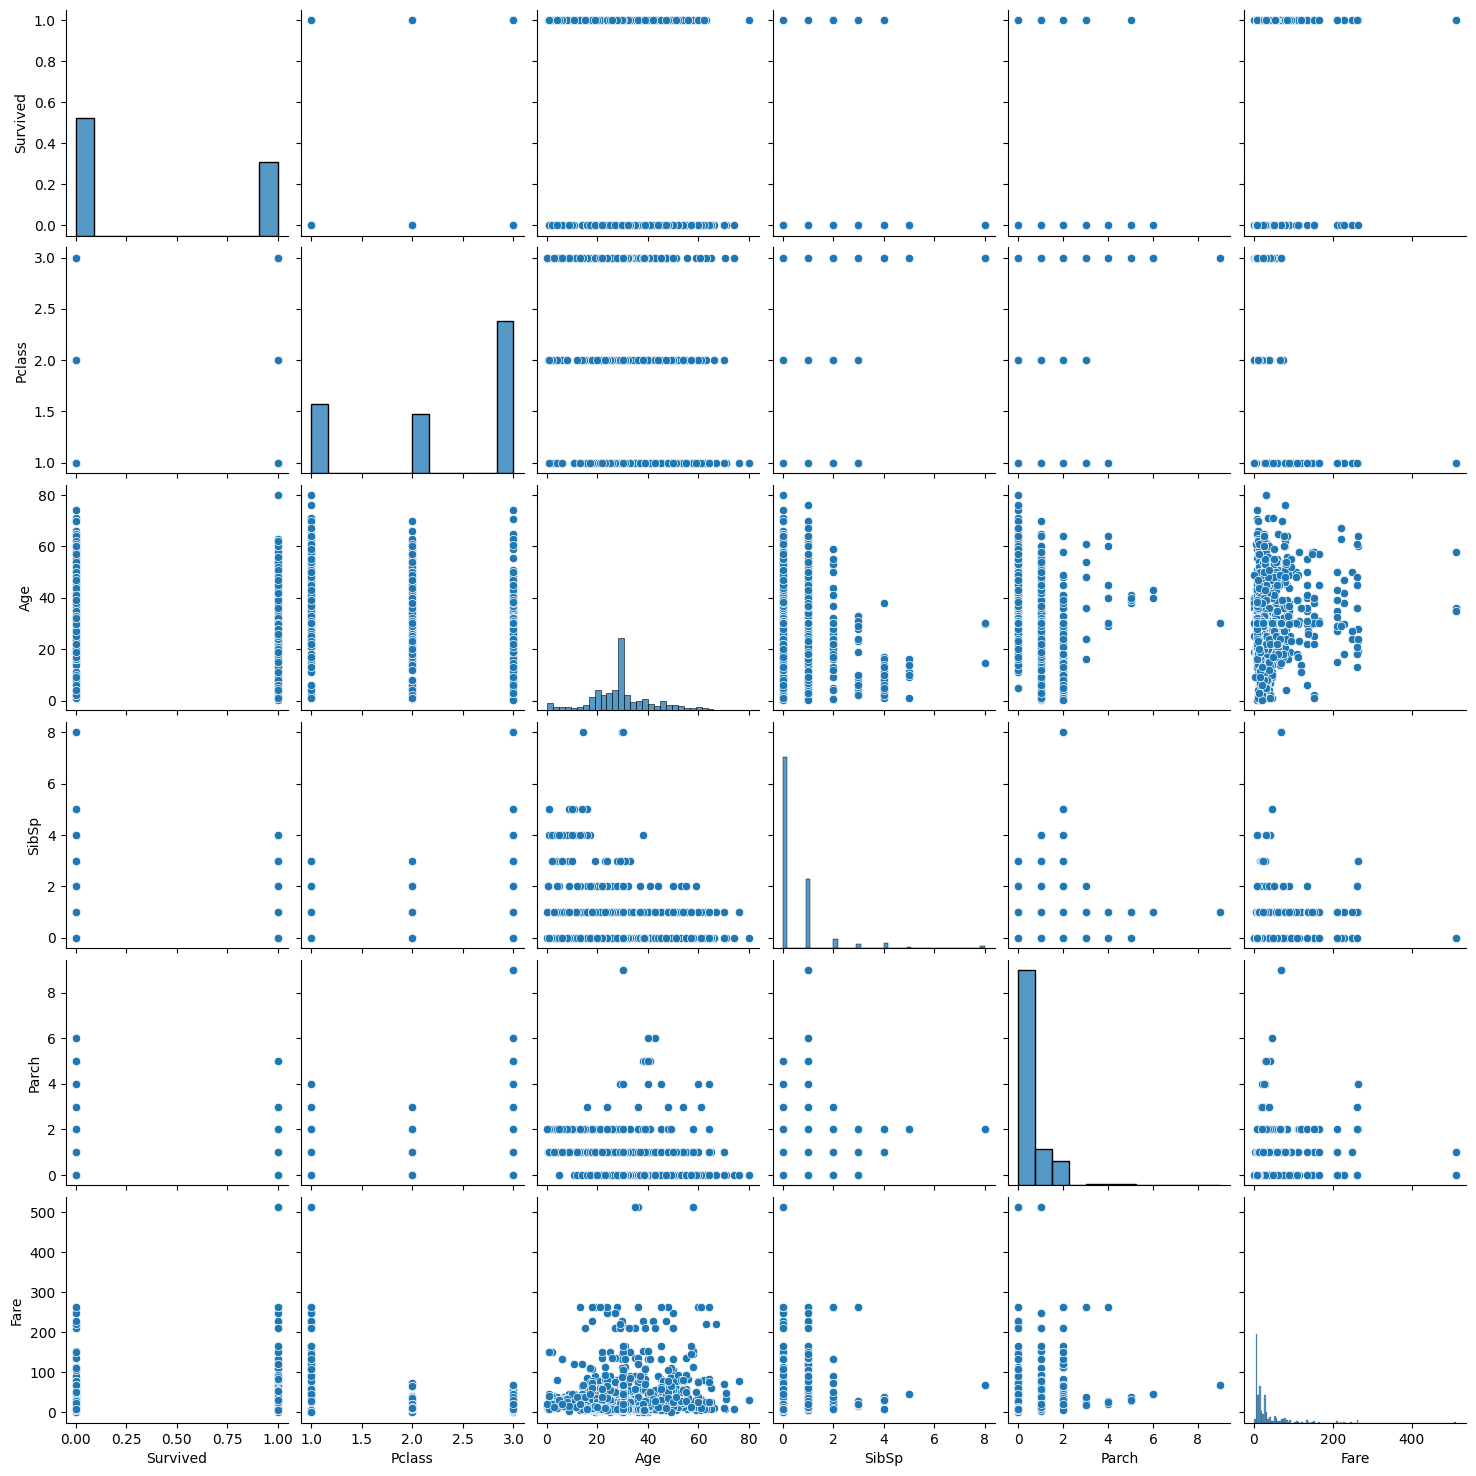

In [59]:
sns.pairplot(data_merged)

<Axes: >

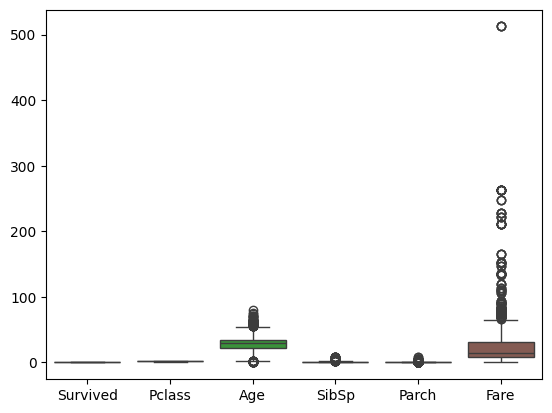

In [60]:
sns.boxplot(data_merged)
# Fare has too many outliers, indicates the people with
# high fares (1st & 2nd class) are very low in no. as median is also low to 10-15
# Age shows that elderly people are very less (as outliers)
# The median likely to be between 25-35 years old

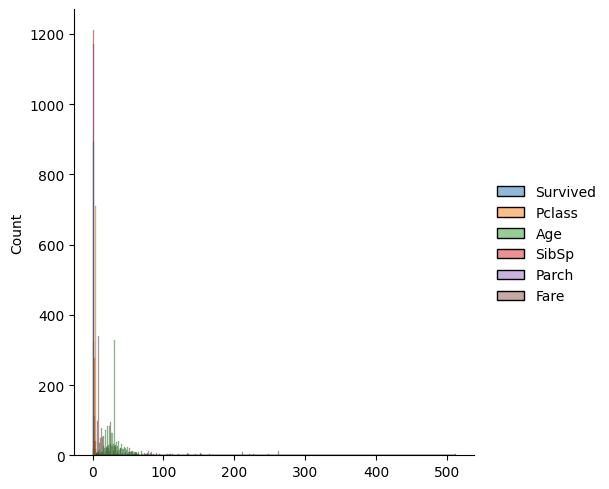

In [61]:
sns.displot(data_merged)

In [62]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     1309 non-null   object 
 8   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [63]:
data_merged.describe()
# Age , the average is 29.88 years. Max is 88 years old.
# Fare, Max. fare price is 512, avg is 33.29 units.
# Pclass, mean is 2.29 indicates that most people are of middle income group (2nd class).
# 75% people are from calss 3rd, which means majority people travelling are of class 3rd.

Survived       Pclass          Age        SibSp        Parch  \
count  891.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean     0.383838     2.294882    29.882243     0.498854     0.385027   
std      0.486592     0.837836    12.883758     1.041658     0.865560   
min      0.000000     1.000000     0.170000     0.000000     0.000000   
25%      0.000000     2.000000    22.000000     0.000000     0.000000   
50%      0.000000     3.000000    29.699118     0.000000     0.000000   
75%      1.000000     3.000000    35.000000     1.000000     0.000000   
max      1.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

In [64]:
target['Sex']=le.fit_transform(target['Sex'])

In [65]:
target['Embarked']=le.fit_transform(target['Embarked'])

In [66]:
target['Cabin']=le.fit_transform(target['Cabin'])

In [67]:
target.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  34.5      0      0   7.8292      7         1
1       3    0  47.0      1      0   7.0000      7         2
2       2    1  62.0      0      0   9.6875      7         1
3       3    1  27.0      0      0   8.6625      7         2
4       3    0  22.0      1      1  12.2875      7         2

In [68]:
x = features.drop(['Survived'],axis=1)
x.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.0      1      0   7.2500      8         2
1       1    0  38.0      1      0  71.2833      2         0
2       3    0  26.0      0      0   7.9250      8         2
3       1    0  35.0      1      0  53.1000      2         2
4       3    1  35.0      0      0   8.0500      8         2

In [69]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [70]:
y= features['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
# EDA-2 (MODEL BUILDING)
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [74]:
column_names=x_train.columns
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc=StandardScaler()

In [77]:
x_train=sc.fit_transform(x_train)

In [78]:
x_test=sc.fit_transform(x_test)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model=LogisticRegression()

In [81]:
model.fit(x_train,y_train)

LogisticRegression()

In [82]:
scaler1 = sc.fit_transform(x_train)

In [83]:
# 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'
scaler = pd.DataFrame(scaler1, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])

In [84]:
joblib.dump(model,'logistic_reg_model.pkl') # Creating a PKL file for deployment later

['logistic_reg_model.pkl']

In [85]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [86]:
y_pred=model.predict(x_train)

In [87]:
# MODEL EVALUATION
from sklearn.metrics import confusion_matrix

In [88]:
cm = confusion_matrix(y_train,y_pred)
cm
# TP = 383 (correctly predicted survived)
# TN = 185 (correctly predicted not-survived)
# FP = 61 (incorrectly predicted survived)
# FN = 83 (incorrectly predicted not-survived)

array([[383,  61],
       [ 83, 185]])

In [89]:
from sklearn.metrics import classification_report

In [90]:
cr=classification_report(y_pred,y_train)

In [91]:
print(cr)
# Training accuracy or F1-Score is 80%, which means its a good model.
# not survived are = 466
# survived are = 246

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       466
           1       0.69      0.75      0.72       246

    accuracy                           0.80       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.80      0.80      0.80       712



In [92]:
import statsmodels.api as sm

In [93]:
X=sm.add_constant(x_train)

In [94]:
reasult=model.fit(x_train,y_train)

In [95]:
logit_model=sm.Logit(y_train,X)

In [96]:
reasult=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.446467
         Iterations 6


In [97]:
print(reasult.summary())
# Overall Pseudo R - square value is 32% which is above 30%, implies that the model is moderately accurate
# Total 4- varibale are significant having values < 0.05 (p-values)
# which are : Pclass, Sex, Age,Sibsp
# Embarked variable is moderately significant.
# Fare is highly insignigficant, followed by Parch & Cabin - moderately insignificant

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.3259
Time:                        06:09:43   Log-Likelihood:                -317.88
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 1.143e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6767      0.102     -6.649      0.000      -0.876      -0.477
x1            -0.6729      0.158     -4.267      0.000      -0.982      -0.364
x2            -1.2993      0.105    -12.366      0.0

In [98]:
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [99]:
pd.DataFrame({'Column0': ['x1','x2','x3','x4','x5','x6','x7','x8'],'Column':column_names, 'Values': model.coef_.reshape(-1)})

Column0    Column    Values
0      x1    Pclass -0.655823
1      x2       Sex -1.282507
2      x3       Age -0.409828
3      x4     SibSp -0.348848
4      x5     Parch -0.105121
5      x6      Fare  0.091931
6      x7     Cabin -0.196662
7      x8  Embarked -0.168059

In [100]:
# CHECKING TEST ACCURACY OF MODEL

In [101]:
model1=LogisticRegression()

In [102]:
model1=model1.fit(x_test,y_test)
model1

LogisticRegression()

In [103]:
y_pred1=model1.predict(x_test)

In [104]:
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [105]:
cm1=confusion_matrix(y_pred1,y_test)
cm1
# TP = 92 (correctly predicted survived)
# TN = 58 (correctly predicted not-survived)
# FP = 16 (incorrectly predicted survived)
# FN = 13 (incorrectly predicted not-survived)

array([[92, 16],
       [13, 58]])

In [106]:
cr1=classification_report(y_pred1,y_test)

In [107]:
print(cr1) # Testing accuracy F1 - Score is 84%
# Testing model

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       108
           1       0.78      0.82      0.80        71

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [108]:
target.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  34.5      0      0   7.8292      7         1
1       3    0  47.0      1      0   7.0000      7         2
2       2    1  62.0      0      0   9.6875      7         1
3       3    1  27.0      0      0   8.6625      7         2
4       3    0  22.0      1      1  12.2875      7         2

In [109]:
features.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500      8         2
1         1       1    0  38.0      1      0  71.2833      2         0
2         1       3    0  26.0      0      0   7.9250      8         2
3         1       1    0  35.0      1      0  53.1000      2         2
4         0       3    1  35.0      0      0   8.0500      8         2

In [110]:
target.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [111]:
target['Fare'].head()

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64

In [112]:
target['Fare'].tail()

413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, dtype: float64

In [113]:
target['Fare'].iloc[152]

np.float64(nan)

In [114]:
target.shape

(418, 8)

In [115]:
target=target.drop([152])

In [116]:
target['Fare'].iloc[152]

np.float64(12.1833)

In [117]:
target.shape

(417, 8)

In [118]:
from sklearn.metrics import roc_curve, auc

In [119]:
# PREDICTION OF TARGET VARIABLES (using file "Titanic_test.csv" )
y_pred_new=model.predict(target)
y_pred_new

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
# ROC - AUC SCORE
y_prob=model.predict_proba(x_test)[:,1]
y_prob

array([0.07763911, 0.17201781, 0.12127354, 0.8558867 , 0.68296542,
       0.89381933, 0.63324322, 0.05795414, 0.72663703, 0.91465236,
       0.28406062, 0.06087974, 0.23717438, 0.12985877, 0.15148098,
       0.9320794 , 0.23852569, 0.6332862 , 0.19161255, 0.31795462,
       0.10846876, 0.29340554, 0.55162043, 0.12159767, 0.09359195,
       0.03559551, 0.3384236 , 0.17285154, 0.04268382, 0.57640153,
       0.12466277, 0.64364992, 0.41606813, 0.58620055, 0.12818079,
       0.09367401, 0.48797992, 0.63324322, 0.90782534, 0.09229084,
       0.11237504, 0.0603867 , 0.09232103, 0.11017918, 0.53871875,
       0.06674777, 0.12472972, 0.11186056, 0.10827776, 0.29038891,
       0.61508929, 0.78382892, 0.0284451 , 0.47108354, 0.03913721,
       0.92059147, 0.1675781 , 0.9298657 , 0.72356759, 0.70753452,
       0.11792047, 0.82193534, 0.67164462, 0.32193356, 0.11017918,
       0.63534824, 0.24802001, 0.09414798, 0.10971796, 0.83399802,
       0.65847384, 0.92741149, 0.56011664, 0.86240077, 0.11154

In [121]:
y_prob.shape

(179,)

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [123]:
fpr, tpr, threshold = roc_curve(y_test,y_prob)

In [124]:
roc_auc=auc(fpr, tpr)
print(roc_auc*100)

87.97940797940798


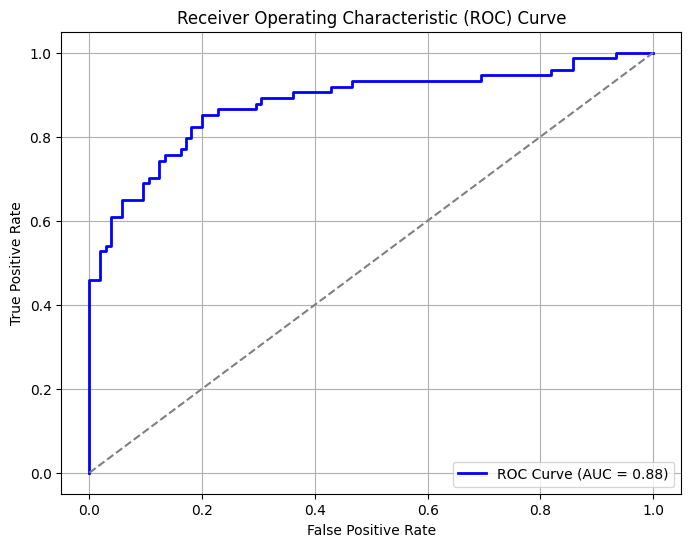

In [125]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# AUC Accuracy is 88%,
# the rate of True positive is high and False positive is low.
# as the curve is above diagonal line, means the model is perfect.

In [126]:
# CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score

In [127]:
kf=KFold(n_splits=10,shuffle=True, random_state=42)

In [128]:
score = cross_val_score(model,x,y,cv=kf,scoring='accuracy')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [129]:
print(score.mean()*100)
# Cross validation score is = 79%

79.11735330836454


In [130]:
# Deployment :

In [131]:
model

LogisticRegression()

In [132]:
%%writefile app.py

Overwriting app.py


In [133]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# ------------------- PAGE CONFIG -------------------
st.set_page_config(
    page_title="Titanic Survival Prediction App",
    layout="centered"
)

# ------------------- CACHING MODEL -------------------
# Load model and scaler once and reuse across sessions
@st.cache_resource
def load_model_and_scaler():
    try:
        return (
            joblib.load('logistic_reg_model.pkl'),
            joblib.load('scaler.pkl')
        )
    except FileNotFoundError as e:
        st.error(f"⚠️ Missing file: {e}. Ensure 'logistic_reg_model.pkl' and 'scaler.pkl' are present.")
        st.stop()

model, scaler = load_model_and_scaler()

# ------------------- MAPPINGS -------------------
EMBARKED_MAPPING = {0: 'C', 1: 'Q', 2: 'S'}
CABIN_MAPPING = {0: 'U', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'T'}

# ------------------- TITLE -------------------
st.title("🚢 Titanic Survival Prediction App")
st.write("Fill in the passenger details below to get the prediction:")

# ------------------- INPUT LAYOUT -------------------
col1, col2 = st.columns(2)

with col1:
    pclass = st.selectbox('Pclass', [1, 2, 3],
                          format_func=lambda x: f"{x} ({'First' if x==1 else 'Second' if x==2 else 'Third'})")
    age = st.number_input('Age', 0, 100, 29)
    parch = st.number_input('Parch', 0, 10, 0, help="Number of Parents/Children Aboard")
    embarked = st.selectbox('Embarked', EMBARKED_MAPPING.keys(),
                            format_func=lambda x: EMBARKED_MAPPING[x])

with col2:
    sex = st.selectbox('Sex', [0, 1], format_func=lambda x: 'Female' if x == 0 else 'Male')
    sibsp = st.number_input('SibSp', 0, 10, 0, help="Number of Siblings/Spouses Aboard")
    fare = st.number_input('Fare', 0.0, 600.0, 32.2)
    cabin = st.selectbox('Cabin', CABIN_MAPPING.keys(), format_func=lambda x: CABIN_MAPPING[x])

# ------------------- PREDICTION FUNCTION -------------------
@st.cache_data(show_spinner=False)
def predict_survival(features):
    """Predict survival with scaled input."""
    input_scaled = scaler.transform(pd.DataFrame([features],
                                columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']))
    prob = model.predict_proba(input_scaled)[0][1]
    return int(prob >= 0.5), prob

# ------------------- BUTTON ACTION -------------------
if st.button('Predict Survival'):
    with st.spinner('Predicting...'):
        features = [pclass, sex, age, sibsp, parch, fare, cabin, embarked]
        prediction, probability = predict_survival(features)

    st.write("---")
    if prediction:
        st.success(f"🎉 Likely to **SURVIVE**! Probability: {probability:.2%}")
    else:
        st.error(f"❌ Not likely to survive. Probability: {probability:.2%}")

2025-08-31 06:09:44.974 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 06:09:44.978 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 06:09:45.226 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-31 06:09:45.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 06:09:45.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 06:09:45.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 06:09:45.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [134]:
! wget -q -o - ipv4.canhanzip.com
 # canhapzip allows us to build domain into scripts to automatically determine
 # what is your public IP address from any system of the earth.

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501
# local tunnel allows us to easily web service on your local network
# machine



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.9.8.34:8501

⠇⠏⠋⠙your url is: https://shaggy-loops-juggle.loca.lt
